## Importing Relavant Libraries

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Default figure size for EDA
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = (14, 5)

## Reading Dataset

In [2]:
# Columns of dataset
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']

# Reading dataset
df=pd.read_csv("adult.data")

# Assigning Column to data
df.columns = columns

# Printing data
print(df.head())

   age          workclass  fnlwgt   education  education.num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital.status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital.gain  capital.loss  hours.per.week  native.country  income  
0             0             0              13   United-States   <=50

In [3]:
print("Shape of data ", df.shape)

Shape of data  (32560, 15)


In [4]:
# Identification of variables and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education.num   32560 non-null  int64 
 5   marital.status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital.gain    32560 non-null  int64 
 11  capital.loss    32560 non-null  int64 
 12  hours.per.week  32560 non-null  int64 
 13  native.country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Cleaning

In [5]:
print("Null values ", df.isnull().sum().sum())

Null values  0


In [6]:
# Checking for duplicates
print("Duplicated rows ", df.duplicated().sum())

Duplicated rows  24


In [7]:
# Dropping duplicate values
df.drop_duplicates(inplace=True)

## Data Analysis + Preprocessing

In [8]:
# Function to show percentage on bars
def per_on_bar(plot,feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

#### Univariate Analysis

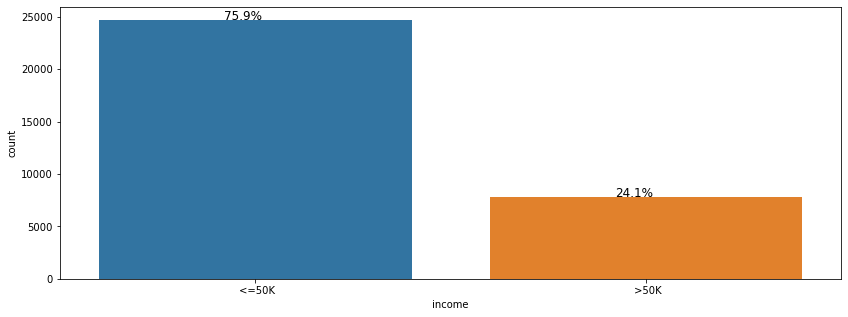

In [9]:
# Checking target variable
ax = sns.countplot(df.income)
per_on_bar(ax, df.income)

In [10]:
#separating the numerical and categorical variables 
cat_var=[x for x in df.columns if df[x].dtype=="O"]
print(cat_var)
num_var=[x for x in df.columns if x not in cat_var]
print(num_var)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


#### Graphical Representation of Categorical Features

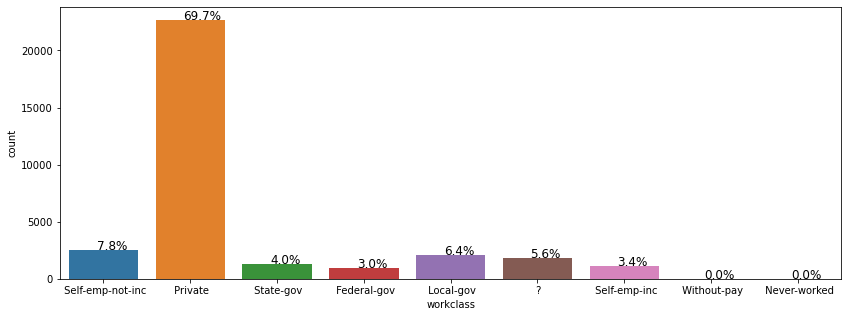

In [11]:
ax = sns.countplot(df[cat_var[0]])
per_on_bar(ax, df[cat_var[0]])

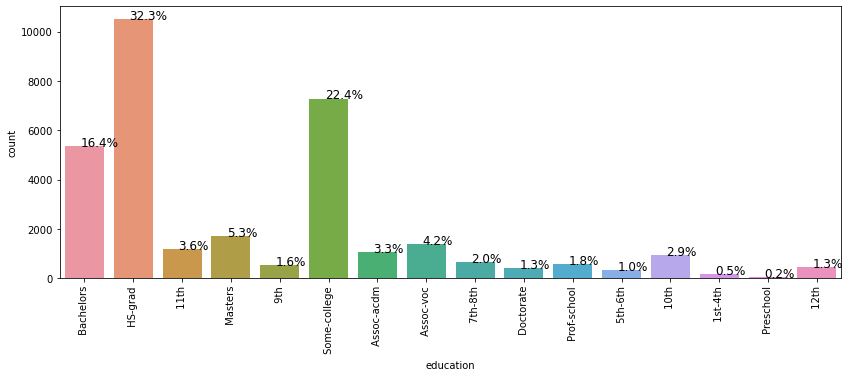

In [12]:
plt.xticks(rotation=90)
ax = sns.countplot(df[cat_var[1]])
per_on_bar(ax, df[cat_var[1]])

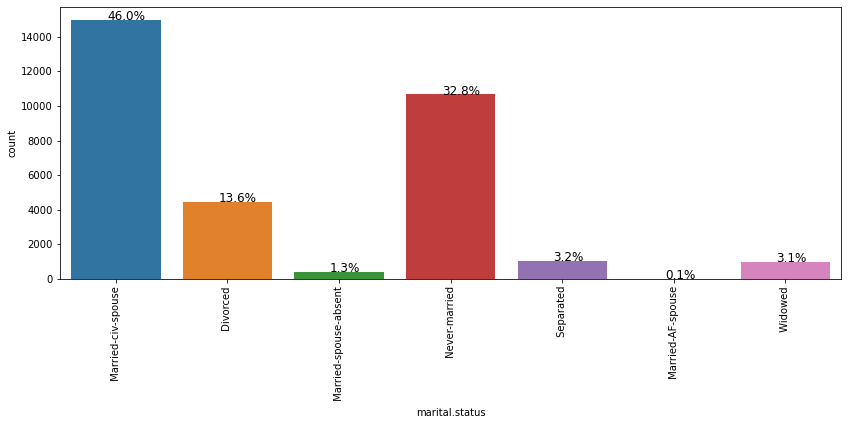

In [13]:
plt.xticks(rotation=90)
ax = sns.countplot(df[cat_var[2]])
per_on_bar(ax, df[cat_var[2]])

Most of the people were married and with the spouse and then next were the people who were single all the time.

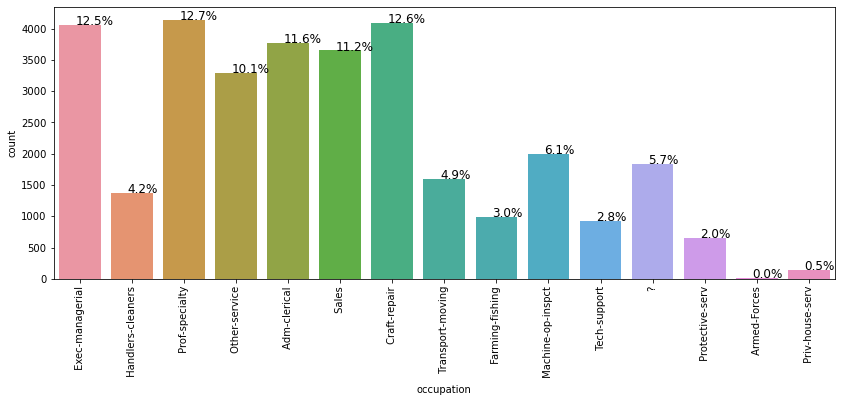

In [14]:
plt.xticks(rotation=90)
ax = sns.countplot(df[cat_var[3]])
per_on_bar(ax, df[cat_var[3]])

Most of the people were Engineer, Professor and Craft-Repair.

But the interesting is that there were very less number of peoples who joined Armed-Forces.

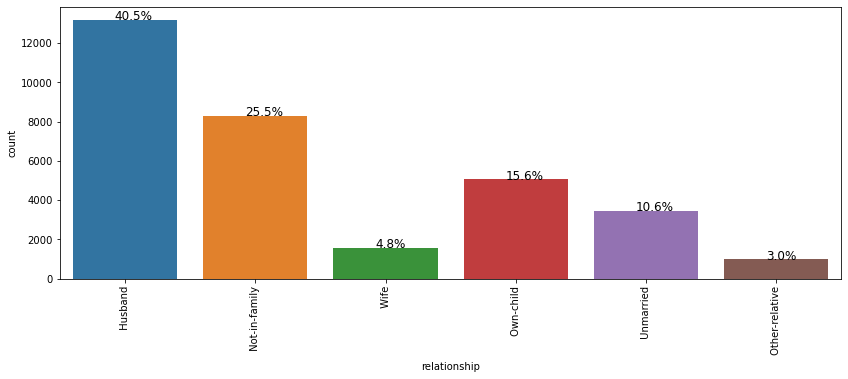

In [15]:
plt.xticks(rotation=90)
ax = sns.countplot(df[cat_var[4]])
per_on_bar(ax, df[cat_var[4]])

Mostly people were having relationship with Husband

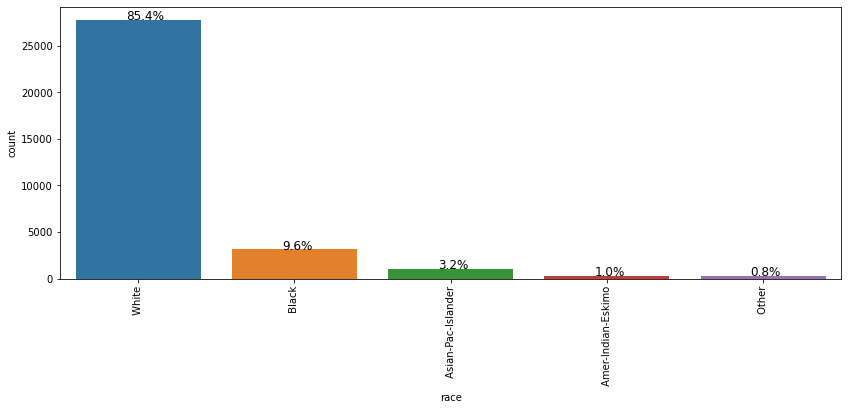

In [16]:
plt.xticks(rotation=90)
ax = sns.countplot(df[cat_var[5]])
per_on_bar(ax, df[cat_var[5]])

By the race almost 85% people were white because it's the data from USA Census.

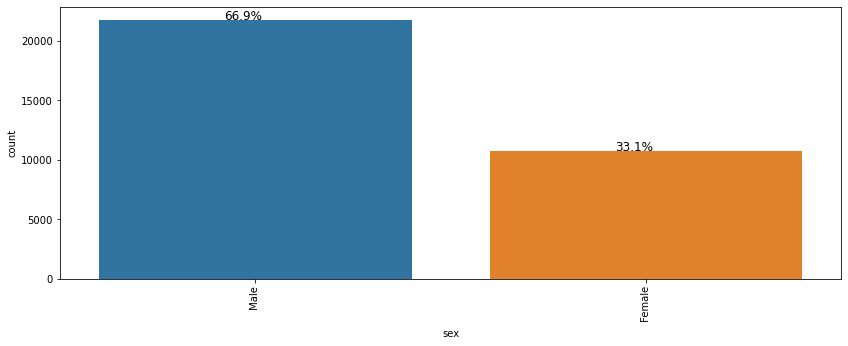

In [17]:
plt.xticks(rotation=90)
ax = sns.countplot(df[cat_var[6]])
per_on_bar(ax, df[cat_var[6]])

Dataset consist of almost 67% Male.

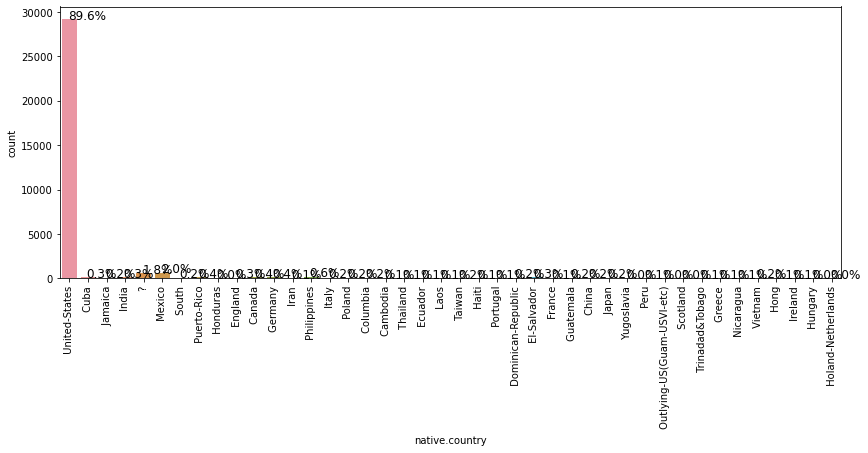

In [18]:
plt.xticks(rotation=90)
ax = sns.countplot(df[cat_var[7]])
per_on_bar(ax, df[cat_var[7]])

**90%** people were natively from USA.

In [19]:
# Replacing other than usa with non_usa to reduce the noice associated with it.
df["native.country"]=np.where((df["native.country"]=="United-States"),"usa","non_usa")

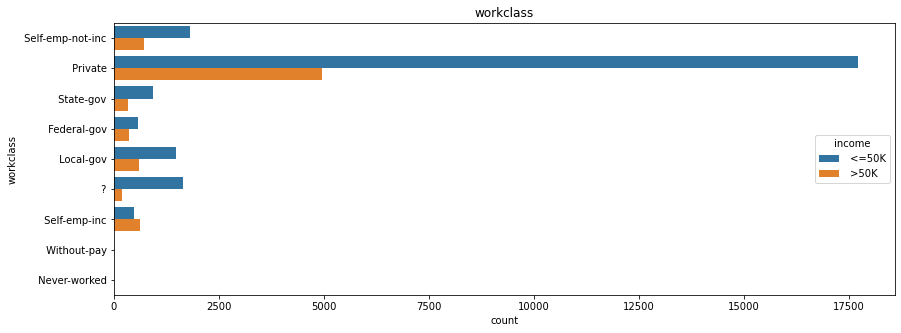

In [20]:
plt.title(cat_var[0])
sns.countplot(y=df[cat_var[0]],hue=df["income"])
plt.show()

Because most of the people were **White** so they are also taking High Income.

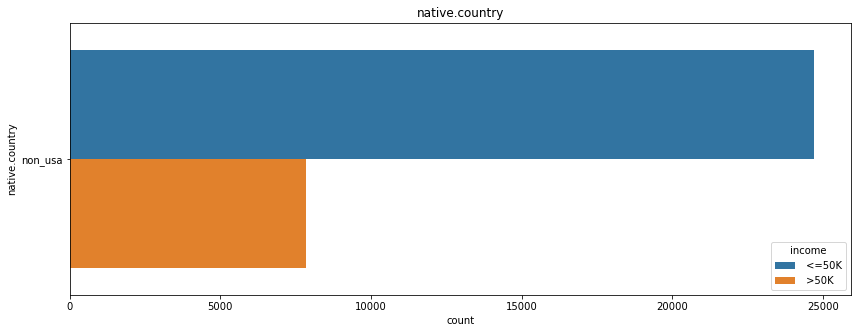

In [21]:
plt.title(cat_var[7])
sns.countplot(y=df[cat_var[7]],hue=df["income"])
plt.show()

#### Conclusion

**Following were Generating More Income**
- Private sector in Workclass
- Bachelors in education
- Married civ spouse in marital Status
- Executive managers are getting high income and professors speciality by Occupation 
- Husbands in Relationship
- White having both low and high income 
- Male in Sex
- People from usa.

In [27]:
# Encoding features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_new = df.copy()
for i in df.select_dtypes("O").columns[:-1]:
    df_new[i] = encoder.fit_transform(df_new[i])

In [28]:
# Balancing data
X, y = SMOTE().fit_resample(df_new.drop("income",axis=1), df_new.income)

## Model Building

In [29]:
# Splitting data into Train, Test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
# Training SVM
classifier = SVC()
classifier.fit(X_train,y_train)
print("Test Accuracy ", classifier.score(X_test,y_test))

Test Accuracy  0.5900072880395174


In [31]:
# Making Prediction on test data
y_pred = classifier.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.55      0.99      0.71      6180
        >50K       0.94      0.19      0.32      6169

    accuracy                           0.59     12349
   macro avg       0.74      0.59      0.51     12349
weighted avg       0.74      0.59      0.51     12349



[]

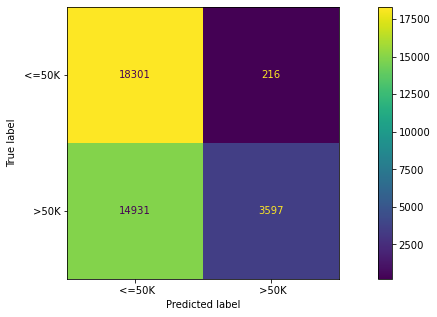

In [33]:
plot_confusion_matrix(classifier, X_train, y_train)
plt.plot()